In [202]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.axes import Axes
import textwrap
from matplotlib.text import Text
from matplotlib.figure import Figure
from matplotlib.transforms import Bbox

In [201]:
def init_card(printsize):
    x_total, y_total = printsize
    
    fig, ax = plt.subplots()
    fig.set_size_inches(printsize)
    fig.subplots_adjust(left=0, bottom=0, right=1, top=1)

    fig.set_facecolor("black")
    plt.axis("off")

    ax.set_xlim(0, x_total)
    ax.set_ylim(0, y_total)

    return fig, ax

In [73]:
def add_mi(ax: Axes, bleed, card_size, misery_index):
    x_size, y_size = card_size
    x_total = x_size + 2 * bleed

    # Add rectangle.
    mi_block = Rectangle(
        (bleed + x_size / 4, 0), x_size / 2, y_size / 8 + bleed, fc="yellow"
    )
    ax.add_patch(mi_block)

    # Add text
    mi_desc = "misery index"
    ax.text(
        x_total / 2,
        1.3 * y_size / 8 + bleed,
        mi_desc.upper(),
        horizontalalignment="center",
        color="yellow",
        fontsize=13,
        weight="extra bold",
        verticalalignment="center",
    )

    ax.text(
        x_total / 2,
        0.05 * y_size + bleed,
        misery_index,
        horizontalalignment="center",
        color="black",
        fontsize=23,
        weight="extra bold",
        verticalalignment="center",
    )

In [270]:
# settings
cm = 1/2.54  # centimeters in inches
x_size = 6.2 * cm
y_size = 8.8 * cm
card_size = (x_size, y_size)

bleed = 0.5 * cm
x_total = x_size + 2 * bleed
y_total = y_size + 2 * bleed
printsize = (x_total, y_total)

desc_pad = 0.3 * cm

In [271]:
situation = "Dit is gewoon een verschrikkelijke kutsituatie die eigenlijk veel te lang is maar oké. Maar het kan nog langer! Kijk maar..."

In [282]:
def add_description(ax: Axes, bleed, pad, card_size, txt: str):
    x_size, y_size = card_size

    if pad:
        bleed += pad
        x_size -= 2 * pad
        y_size -= 2 * pad

    rect = Rectangle((bleed, bleed + 0.6 * y_size), x_size, 0.4 * y_size, alpha=0)
    ax.add_patch(rect)

    # Get transformation to go from display to data-coordinates.
    inv_data = ax.transData.inverted()

    fig: Figure = ax.get_figure()
    dpi = fig.dpi
    rect_height_inch = rect.get_height() / dpi

    # Initial fontsize according to the height of boxes
    fontsize = rect_height_inch * 72

    wrap_lines = 1
    xy = (bleed + 0.5 * x_size, bleed + 0.95 * y_size)
    while True:
        wrapped_txt = "\n".join(textwrap.wrap(txt, width=len(txt) // wrap_lines))
        text: Text = ax.annotate(wrapped_txt, xy, ha="center", va="top", color="yellow")
        text.set_fontsize(fontsize)

        # Adjust the fontsize according to the box size.
        bbox: Bbox = text.get_window_extent()
        inv_text_bbox = inv_data.transform(bbox)
        width_text = inv_text_bbox[1][0] - inv_text_bbox[0][0]
        adjusted_size = fontsize * rect.get_width() / width_text
        if adjusted_size >= 11:
            break
        text.remove()
        wrap_lines += 1
    text.set_fontsize(adjusted_size)

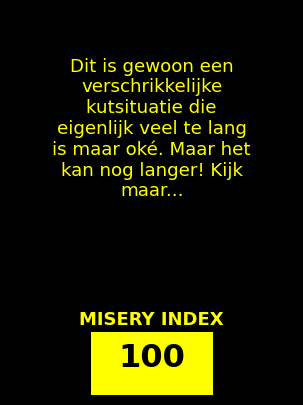

In [284]:
fig, ax = init_card(printsize)

add_mi(ax, bleed, card_size, 100)

add_description(ax, bleed, desc_pad, card_size, situation)

fig.savefig("test.pdf")